**CrossRef - Data Download**

In [2]:
import json, requests
headers={'User-Agent': 'BibExample/0.1 (mailto:info@inforesearch.co.uk)',}
r=requests.get('https://api.crossref.org/works/?query.affiliation=cybermetrics&rows=100',  
     headers=headers)
results=json.loads(r.text)


**CrossRef - Data Transformation and Cleaning**

In [3]:
import networkx as nx
G= nx.Graph()
for paper in results['message']['items']:
    try:
        authorSet = set()
        for author in paper['author']:
            try:
                name=author['family']+", "+author['given']
                G.add_node(name)
                authorSet.add(name)  
            except:
                print ('Error:no family or given name')
        for x in authorSet:
            for y in authorSet:
                if x!=y:
                    G.add_edge(x,y)
    except:
        print ('Error:no author')


In [4]:
G=nx.contracted_nodes(G, 'Buckley, K.', 'Buckley, Kevan', self_loops=False)
G=nx.contracted_nodes(G, 'Hołyst, J.', 'Hołyst, J.A.', self_loops=False)
G=nx.contracted_nodes(G, 'Thelwall, M.', 'Thelwall, Mike', self_loops=False)
G=nx.contracted_nodes(G, 'Thelwall, M.', 'THELWALL, MIKE', self_loops=False)
G=nx.contracted_nodes(G, 'Thelwall, M.', 'Thelwall, Michael', self_loops=False)

In [5]:
largest_cc = max(nx.connected_component_subgraphs(G), key=len)

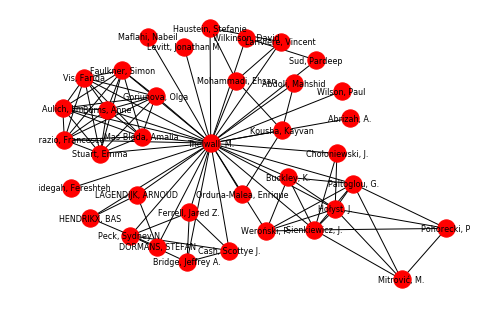

In [6]:
import matplotlib.pyplot as plt
pos=nx.kamada_kawai_layout(largest_cc)
nx.draw (largest_cc, pos)
nx.draw_networkx_labels(largest_cc, pos, font_size=8)
plt.show(largest_cc)
